## Case 01 ##

Group of countries according to cultures.

The Hofstede model allows characterizing the culture supported on studies on national values.

Those values are:

* PDI - Power distance
* IDV - Individualism
* MAS - Motivation - Aspiration
* UAI - Uncertainty avoidance
* LTOWVS - Long Term Orientation
* IVR - Indulgencs vs. Restraing

This study identifies the value of a specific country. Is it possible identifying groups of countries with similar cultures?


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [32]:
file='https://raw.githubusercontent.com/masterfloss/data/main/culture2015.csv'
df=pd.read_csv(file, sep=";")

In [33]:
df.head()

ctr      country     pdi     idv     mas     uai  ltowvs ivr
0  AFE  Africa East      64      27      41      52      32  40
1  AFW  Africa West      77      20      46      54       9  78
2  ALB      Albania  #NULL!  #NULL!  #NULL!  #NULL!      61  15
3  ALG      Algeria  #NULL!  #NULL!  #NULL!  #NULL!      26  32
4  AND      Andorra  #NULL!  #NULL!  #NULL!  #NULL!  #NULL!  65

In [34]:
df.dtypes

ctr        object
country    object
pdi        object
idv        object
mas        object
uai        object
ltowvs     object
ivr        object
dtype: object

In [35]:
#df.iloc[:,2]=pd.to_numeric(df.iloc[:,2], errors='coerce')

for i in range(2,8):
    df.iloc[:,i]=pd.to_numeric(df.iloc[:,i], errors='coerce')


In [36]:
df=df.dropna()
df

ctr         country   pdi   idv   mas    uai  ltowvs    ivr
0    AFE     Africa East  64.0  27.0  41.0   52.0    32.0   40.0
1    AFW     Africa West  77.0  20.0  46.0   54.0     9.0   78.0
5    ARA  Arab countries  80.0  38.0  53.0   68.0    23.0   34.0
6    ARG       Argentina  49.0  46.0  56.0   86.0    20.0   62.0
8    AUL       Australia  38.0  90.0  61.0   51.0    21.0   71.0
..   ...             ...   ...   ...   ...    ...     ...    ...
102  TUR          Turkey  66.0  37.0  45.0   85.0    46.0   49.0
103  USA          U.S.A.  40.0  91.0  62.0   46.0    26.0   68.0
106  URU         Uruguay  61.0  36.0  38.0  100.0    26.0   53.0
107  VEN       Venezuela  81.0  12.0  73.0   76.0    16.0  100.0
108  VIE         Vietnam  70.0  20.0  40.0   30.0    57.0   35.0

[65 rows x 8 columns]

In [37]:
df=df.reset_index()

In [38]:
df1=df.iloc[:,3:9]


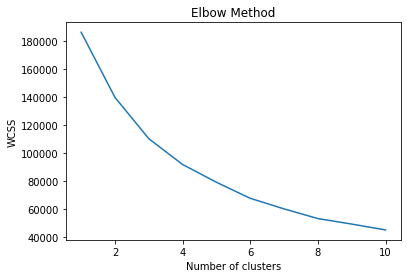

In [40]:
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(df1)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
kmeans = KMeans(n_clusters=5).fit(df1)
centroids = kmeans.cluster_centers_
print(centroids)

[[32.09090909 77.81818182 39.63636364 43.45454545 38.09090909 67.63636364]
 [69.1        35.55       42.3        85.7        41.1        40.3       ]
 [76.14285714 25.21428571 54.78571429 46.57142857 61.21428571 32.21428571]
 [66.85714286 22.28571429 58.         75.28571429 16.42857143 84.14285714]
 [45.07692308 65.07692308 56.15384615 73.38461538 72.         39.        ]]


In [42]:
pred_y =kmeans.predict(df1)

In [43]:
df2=pred_y.shape

In [44]:
df.shape

(65, 9)

In [45]:
df2=pd.DataFrame(pred_y, columns=['groups'])

In [46]:
df2

groups
0        2
1        3
2        1
3        3
4        0
..     ...
60       1
61       0
62       1
63       3
64       2

[65 rows x 1 columns]

In [47]:
XY2=df.merge(df2,left_index=True, right_index=True)

In [48]:
XY2

index  ctr         country   pdi   idv   mas    uai  ltowvs    ivr  groups
0       0  AFE     Africa East  64.0  27.0  41.0   52.0    32.0   40.0       2
1       1  AFW     Africa West  77.0  20.0  46.0   54.0     9.0   78.0       3
2       5  ARA  Arab countries  80.0  38.0  53.0   68.0    23.0   34.0       1
3       6  ARG       Argentina  49.0  46.0  56.0   86.0    20.0   62.0       3
4       8  AUL       Australia  38.0  90.0  61.0   51.0    21.0   71.0       0
..    ...  ...             ...   ...   ...   ...    ...     ...    ...     ...
60    102  TUR          Turkey  66.0  37.0  45.0   85.0    46.0   49.0       1
61    103  USA          U.S.A.  40.0  91.0  62.0   46.0    26.0   68.0       0
62    106  URU         Uruguay  61.0  36.0  38.0  100.0    26.0   53.0       1
63    107  VEN       Venezuela  81.0  12.0  73.0   76.0    16.0  100.0       3
64    108  VIE         Vietnam  70.0  20.0  40.0   30.0    57.0   35.0       2

[65 rows x 10 columns]

In [49]:
XY2[XY2.groups == 6]

Empty DataFrame
Columns: [index, ctr, country, pdi, idv, mas, uai, ltowvs, ivr, groups]
Index: []

In [50]:
XY2[XY2.groups == 4]

index  ctr      country   pdi   idv   mas   uai  ltowvs   ivr  groups
5       9  AUT      Austria  11.0  55.0  79.0  70.0    60.0  63.0       4
7      13  BEL      Belgium  65.0  75.0  54.0  94.0    82.0  57.0       4
15     28  CZE    Czech Rep  57.0  58.0  57.0  74.0    70.0  29.0       4
18     35  EST      Estonia  40.0  60.0  30.0  60.0    82.0  16.0       4
20     37  FRA       France  68.0  71.0  43.0  86.0    63.0  48.0       4
21     39  GER      Germany  35.0  67.0  66.0  65.0    83.0  40.0       4
25     46  HUN      Hungary  46.0  80.0  88.0  82.0    58.0  31.0       4
30     54  ITA        Italy  50.0  76.0  70.0  75.0    61.0  30.0       4
31     56  JPN        Japan  54.0  46.0  95.0  92.0    88.0  42.0       4
33     60  LAT       Latvia  44.0  70.0   9.0  63.0    69.0  13.0       4
34     61  LIT    Lithuania  42.0  60.0  19.0  65.0    82.0  16.0       4
35     62  LUX   Luxembourg  40.0  60.0  50.0  70.0    64.0  56.0       4
56     95  SWI  Switzerland  34.0  68.0  70.0  58.0    74.0  66.0       4

In [51]:
centroids = kmeans.cluster_centers_

In [52]:
centroids

array([[32.09090909, 77.81818182, 39.63636364, 43.45454545, 38.09090909,
        67.63636364],
       [69.1       , 35.55      , 42.3       , 85.7       , 41.1       ,
        40.3       ],
       [76.14285714, 25.21428571, 54.78571429, 46.57142857, 61.21428571,
        32.21428571],
       [66.85714286, 22.28571429, 58.        , 75.28571429, 16.42857143,
        84.14285714],
       [45.07692308, 65.07692308, 56.15384615, 73.38461538, 72.        ,
        39.        ]])

In [56]:
df2=pd.DataFrame(pred_y, columns=['groups'])

In [57]:
df2

groups
0        2
1        3
2        1
3        3
4        0
..     ...
60       1
61       0
62       1
63       3
64       2

[65 rows x 1 columns]